# Volunteer Engagement Analysis Dashboard

## Executive Summary

This analysis provides strategic insights into volunteer engagement, retention, and program effectiveness. Designed for executive leadership to understand volunteer program performance and identify growth opportunities.

## Key Performance Indicators (KPIs)

- **Volunteer Retention Rate**: Active vs. historical volunteers
- **Economic Impact**: Value of volunteer contributions
- **Engagement Efficiency**: Hours per volunteer, program utilization
- **Geographic Reach**: Volunteer distribution and recruitment opportunities
- **Program Structure**: Groups, roles, and opportunity management
- **Trend Analysis**: Year-over-year growth and seasonal patterns

## Setup and Configuration

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
from typing import Dict, List, Any

from neon_crm import NeonClient
from neon_crm.exceptions import NeonAPIError

# Configure visualization settings
plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
warnings.filterwarnings('ignore')

# Initialize client with built-in retry capability
def initialize_client():
    """Initialize Neon CRM client with built-in retry logic."""
    try:
        # The Neon CRM client already has excellent retry logic built-in!
        client = NeonClient(
            org_id=os.getenv("NEON_ORG_ID"),
            api_key=os.getenv("NEON_API_KEY"),
            max_retries=5,    # Automatic retry on connection failures
            timeout=90.0,     # Longer timeout for complex analysis operations
        )
        print("✅ Neon CRM client initialized successfully")
        print(f"   🔄 Built-in retry logic: {client.max_retries} attempts")
        print(f"   ⏱️  Timeout: {client.timeout}s")
        print("   💡 Auto-handles: timeouts, connection errors, rate limits, server errors")
        return client
    except Exception as e:
        print(f"❌ Failed to initialize client: {e}")
        return None

client = initialize_client()

✅ Neon CRM client initialized successfully
   🔄 Built-in retry logic: 5 attempts
   ⏱️  Timeout: 90.0s
   💡 Auto-handles: timeouts, connection errors, rate limits, server errors


## Data Collection and Processing

In [2]:
def collect_volunteer_data():
    """Collect comprehensive volunteer data from Neon CRM focusing on opportunities and participation."""
    if not client:
        print("❌ Client not available")
        return None, None, None
    
    print("📊 Collecting volunteer data...")
    print("   💡 Focusing on volunteer opportunities and participation rather than hours")
    print("   💡 Using built-in retry logic for robust data collection")
    
    try:
        # Get volunteers with assigned opportunities
        volunteers_with_opportunities_search = {
            "searchFields": [
                {"field": "Assigned Opportunities", "operator": "NOT_BLANK"}
            ],
            "outputFields": [
                "Account ID", "First Name", "Last Name", "Company Name", "Account Type",
                "Email 1", "City", "State/Province",
                "Volunteer Group", "Volunteer Role",
                "Assigned Opportunities"
            ],
            "pagination": {"currentPage": 0, "pageSize": 200}
        }
        
        # Get volunteers by group (if groups are being used)
        volunteers_with_groups_search = {
            "searchFields": [
                {"field": "Volunteer Group", "operator": "NOT_BLANK"}
            ],
            "outputFields": [
                "Account ID", "First Name", "Last Name", "Company Name", "Account Type",
                "Email 1", "City", "State/Province",
                "Volunteer Group", "Volunteer Role"
            ],
            "pagination": {"currentPage": 0, "pageSize": 200}
        }
        
        # Get volunteers by role (if roles are being used)
        volunteers_with_roles_search = {
            "searchFields": [
                {"field": "Volunteer Role", "operator": "NOT_BLANK"}
            ],
            "outputFields": [
                "Account ID", "First Name", "Last Name", "Company Name", "Account Type",
                "Email 1", "City", "State/Province",
                "Volunteer Group", "Volunteer Role"
            ],
            "pagination": {"currentPage": 0, "pageSize": 200}
        }
        
        print("   Fetching volunteers with assigned opportunities...")
        try:
            volunteers_with_opportunities = list(client.accounts.search(volunteers_with_opportunities_search))
            print(f"   ✅ Found {len(volunteers_with_opportunities)} volunteers with opportunities")
        except Exception as e:
            print(f"   ⚠️  Opportunity data search failed: {e}")
            volunteers_with_opportunities = []
        
        print("   Fetching volunteers with groups...")
        try:
            volunteers_with_groups = list(client.accounts.search(volunteers_with_groups_search))
            print(f"   ✅ Found {len(volunteers_with_groups)} volunteers with groups")
        except Exception as e:
            print(f"   ⚠️  Group data search failed: {e}")
            volunteers_with_groups = []
        
        print("   Fetching volunteers with roles...")
        try:
            volunteers_with_roles = list(client.accounts.search(volunteers_with_roles_search))
            print(f"   ✅ Found {len(volunteers_with_roles)} volunteers with roles")
        except Exception as e:
            print(f"   ⚠️  Role data search failed: {e}")
            volunteers_with_roles = []
        
        # Combine all volunteers and deduplicate by Account ID
        all_volunteers = {}
        
        for volunteer_list in [volunteers_with_opportunities, volunteers_with_groups, volunteers_with_roles]:
            for volunteer in volunteer_list:
                account_id = volunteer.get("Account ID")
                if account_id:
                    if account_id not in all_volunteers:
                        all_volunteers[account_id] = volunteer
                    else:
                        # Merge data, preferring non-empty values
                        existing = all_volunteers[account_id]
                        for key, value in volunteer.items():
                            if value and not existing.get(key):
                                existing[key] = value
        
        all_volunteers_list = list(all_volunteers.values())
        
        print(f"   ✅ Total unique volunteers identified: {len(all_volunteers_list)}")
        print(f"   📊 Analysis will focus on:")
        print(f"      • Volunteer participation and engagement")
        print(f"      • Opportunity assignments and distribution") 
        print(f"      • Group and role organization")
        print(f"      • Geographic and demographic insights")
        
        return all_volunteers_list, volunteers_with_opportunities, volunteers_with_groups
        
    except Exception as e:
        print(f"❌ Unexpected error: {e}")
        print("💡 The client already attempted retries for connection issues")
        return None, None, None

all_volunteers, opportunity_volunteers, group_volunteers = collect_volunteer_data()

📊 Collecting volunteer data...
   💡 Focusing on volunteer opportunities and participation rather than hours
   💡 Using built-in retry logic for robust data collection
   Fetching volunteers with assigned opportunities...
   ✅ Found 425 volunteers with opportunities
   Fetching volunteers with groups...
   ✅ Found 143 volunteers with groups
   Fetching volunteers with roles...
   ✅ Found 1 volunteers with roles
   ✅ Total unique volunteers identified: 477
   📊 Analysis will focus on:
      • Volunteer participation and engagement
      • Opportunity assignments and distribution
      • Group and role organization
      • Geographic and demographic insights


## Executive KPI Dashboard

In [3]:
def calculate_executive_kpis(all_volunteers, opportunity_volunteers, group_volunteers):
    """Calculate key performance indicators for executive dashboard focused on participation."""
    if not all_volunteers:
        print("❌ No volunteer data available for KPI calculation")
        return None
    
    print("📊 EXECUTIVE VOLUNTEER DASHBOARD")
    print("=" * 50)
    print("   💡 Metrics based on participation and engagement, not hours")
    
    # Basic metrics
    total_volunteers = len(all_volunteers)
    volunteers_with_opportunities = len(opportunity_volunteers) if opportunity_volunteers else 0
    volunteers_with_groups = len(group_volunteers) if group_volunteers else 0
    
    # Participation rates
    opportunity_participation_rate = (volunteers_with_opportunities / total_volunteers * 100) if total_volunteers > 0 else 0
    group_participation_rate = (volunteers_with_groups / total_volunteers * 100) if total_volunteers > 0 else 0
    
    # Count types and demographics
    individual_count = 0
    organization_count = 0
    
    # Geographic distribution
    states = {}
    cities = {}
    
    # Group and role analysis
    groups = {}
    roles = {}
    
    # Opportunity analysis
    opportunity_assignments = []
    
    for volunteer in all_volunteers:
        # Count account types
        if volunteer.get("Account Type") == "INDIVIDUAL":
            individual_count += 1
        elif volunteer.get("Account Type") == "Organization":
            organization_count += 1
        
        # Geographic data
        state = volunteer.get("State/Province")
        if state:
            states[state] = states.get(state, 0) + 1
        
        city = volunteer.get("City")
        if city:
            cities[city] = cities.get(city, 0) + 1
        
        # Groups and roles
        group = volunteer.get("Volunteer Group")
        if group:
            groups[group] = groups.get(group, 0) + 1
        
        role = volunteer.get("Volunteer Role")
        if role:
            roles[role] = roles.get(role, 0) + 1
        
        # Opportunities
        opportunities = volunteer.get("Assigned Opportunities")
        if opportunities:
            # If opportunities is a string, try to count them
            if isinstance(opportunities, str):
                # Count comma-separated opportunities or similar patterns
                opp_count = len([x.strip() for x in opportunities.split(',') if x.strip()])
            else:
                opp_count = 1
            opportunity_assignments.append(opp_count)
    
    # Calculate opportunity statistics
    total_opportunity_assignments = sum(opportunity_assignments) if opportunity_assignments else 0
    avg_opportunities_per_volunteer = (total_opportunity_assignments / volunteers_with_opportunities) if volunteers_with_opportunities > 0 else 0
    max_opportunities = max(opportunity_assignments) if opportunity_assignments else 0
    
    # Display KPIs
    print(f"\n🎯 KEY PERFORMANCE INDICATORS")
    print("-" * 30)
    print(f"Total Volunteers:                 {total_volunteers:,}")
    print(f"Volunteers with Opportunities:    {volunteers_with_opportunities:,}")
    print(f"Volunteers with Groups:           {volunteers_with_groups:,}")
    print(f"Individual Volunteers:            {individual_count:,}")
    print(f"Organization Volunteers:          {organization_count:,}")
    
    print(f"\n📈 PARTICIPATION METRICS")
    print("-" * 25)
    print(f"Opportunity Participation Rate:   {opportunity_participation_rate:.1f}%")
    print(f"Group Participation Rate:         {group_participation_rate:.1f}%")
    print(f"Total Opportunity Assignments:    {total_opportunity_assignments:,}")
    print(f"Avg Opportunities per Volunteer:  {avg_opportunities_per_volunteer:.1f}")
    print(f"Max Opportunities (Single Vol):   {max_opportunities:,}")
    
    print(f"\n🏢 ORGANIZATIONAL STRUCTURE")
    print("-" * 30)
    print(f"Active Volunteer Groups:          {len(groups):,}")
    print(f"Active Volunteer Roles:           {len(roles):,}")
    print(f"Geographic Presence (States):     {len(states):,}")
    print(f"Geographic Presence (Cities):     {len(cities):,}")
    
    # Top groups and roles
    if groups:
        top_groups = sorted(groups.items(), key=lambda x: x[1], reverse=True)[:3]
        print(f"\n👥 TOP VOLUNTEER GROUPS")
        print("-" * 25)
        for i, (group, count) in enumerate(top_groups, 1):
            print(f"{i}. {group}: {count} volunteers")
    
    if roles:
        top_roles = sorted(roles.items(), key=lambda x: x[1], reverse=True)[:3]
        print(f"\n🎭 TOP VOLUNTEER ROLES")
        print("-" * 24)
        for i, (role, count) in enumerate(top_roles, 1):
            print(f"{i}. {role}: {count} volunteers")
    
    if states:
        top_states = sorted(states.items(), key=lambda x: x[1], reverse=True)[:3]
        print(f"\n🗺️  TOP GEOGRAPHIC AREAS")
        print("-" * 26)
        for i, (state, count) in enumerate(top_states, 1):
            print(f"{i}. {state}: {count} volunteers")
    
    # Return data for further analysis
    return {
        'total_volunteers': total_volunteers,
        'volunteers_with_opportunities': volunteers_with_opportunities,
        'volunteers_with_groups': volunteers_with_groups,
        'opportunity_participation_rate': opportunity_participation_rate,
        'group_participation_rate': group_participation_rate,
        'total_opportunity_assignments': total_opportunity_assignments,
        'avg_opportunities_per_volunteer': avg_opportunities_per_volunteer,
        'max_opportunities': max_opportunities,
        'individual_count': individual_count,
        'organization_count': organization_count,
        'groups': groups,
        'roles': roles,
        'states': states,
        'cities': cities,
        'opportunity_assignments': opportunity_assignments
    }

kpis = calculate_executive_kpis(all_volunteers, opportunity_volunteers, group_volunteers)


📊 EXECUTIVE VOLUNTEER DASHBOARD
   💡 Metrics based on participation and engagement, not hours

🎯 KEY PERFORMANCE INDICATORS
------------------------------
Total Volunteers:                 477
Volunteers with Opportunities:    425
Volunteers with Groups:           143
Individual Volunteers:            0
Organization Volunteers:          0

📈 PARTICIPATION METRICS
-------------------------
Opportunity Participation Rate:   89.1%
Group Participation Rate:         30.0%
Total Opportunity Assignments:    425
Avg Opportunities per Volunteer:  1.0
Max Opportunities (Single Vol):   1

🏢 ORGANIZATIONAL STRUCTURE
------------------------------
Active Volunteer Groups:          22
Active Volunteer Roles:           1
Geographic Presence (States):     3
Geographic Presence (Cities):     18

👥 TOP VOLUNTEER GROUPS
-------------------------
1. Coffee Klatch: 61 volunteers
2. Front Desk Volunteers: 18 volunteers
3. Postcard Writing 2/21: 17 volunteers

🎭 TOP VOLUNTEER ROLES
------------------------
1

## Volunteer Engagement Analysis & Visualizations

📊 Creating Volunteer Engagement Dashboard...
   💡 Dashboard focuses on participation and engagement metrics


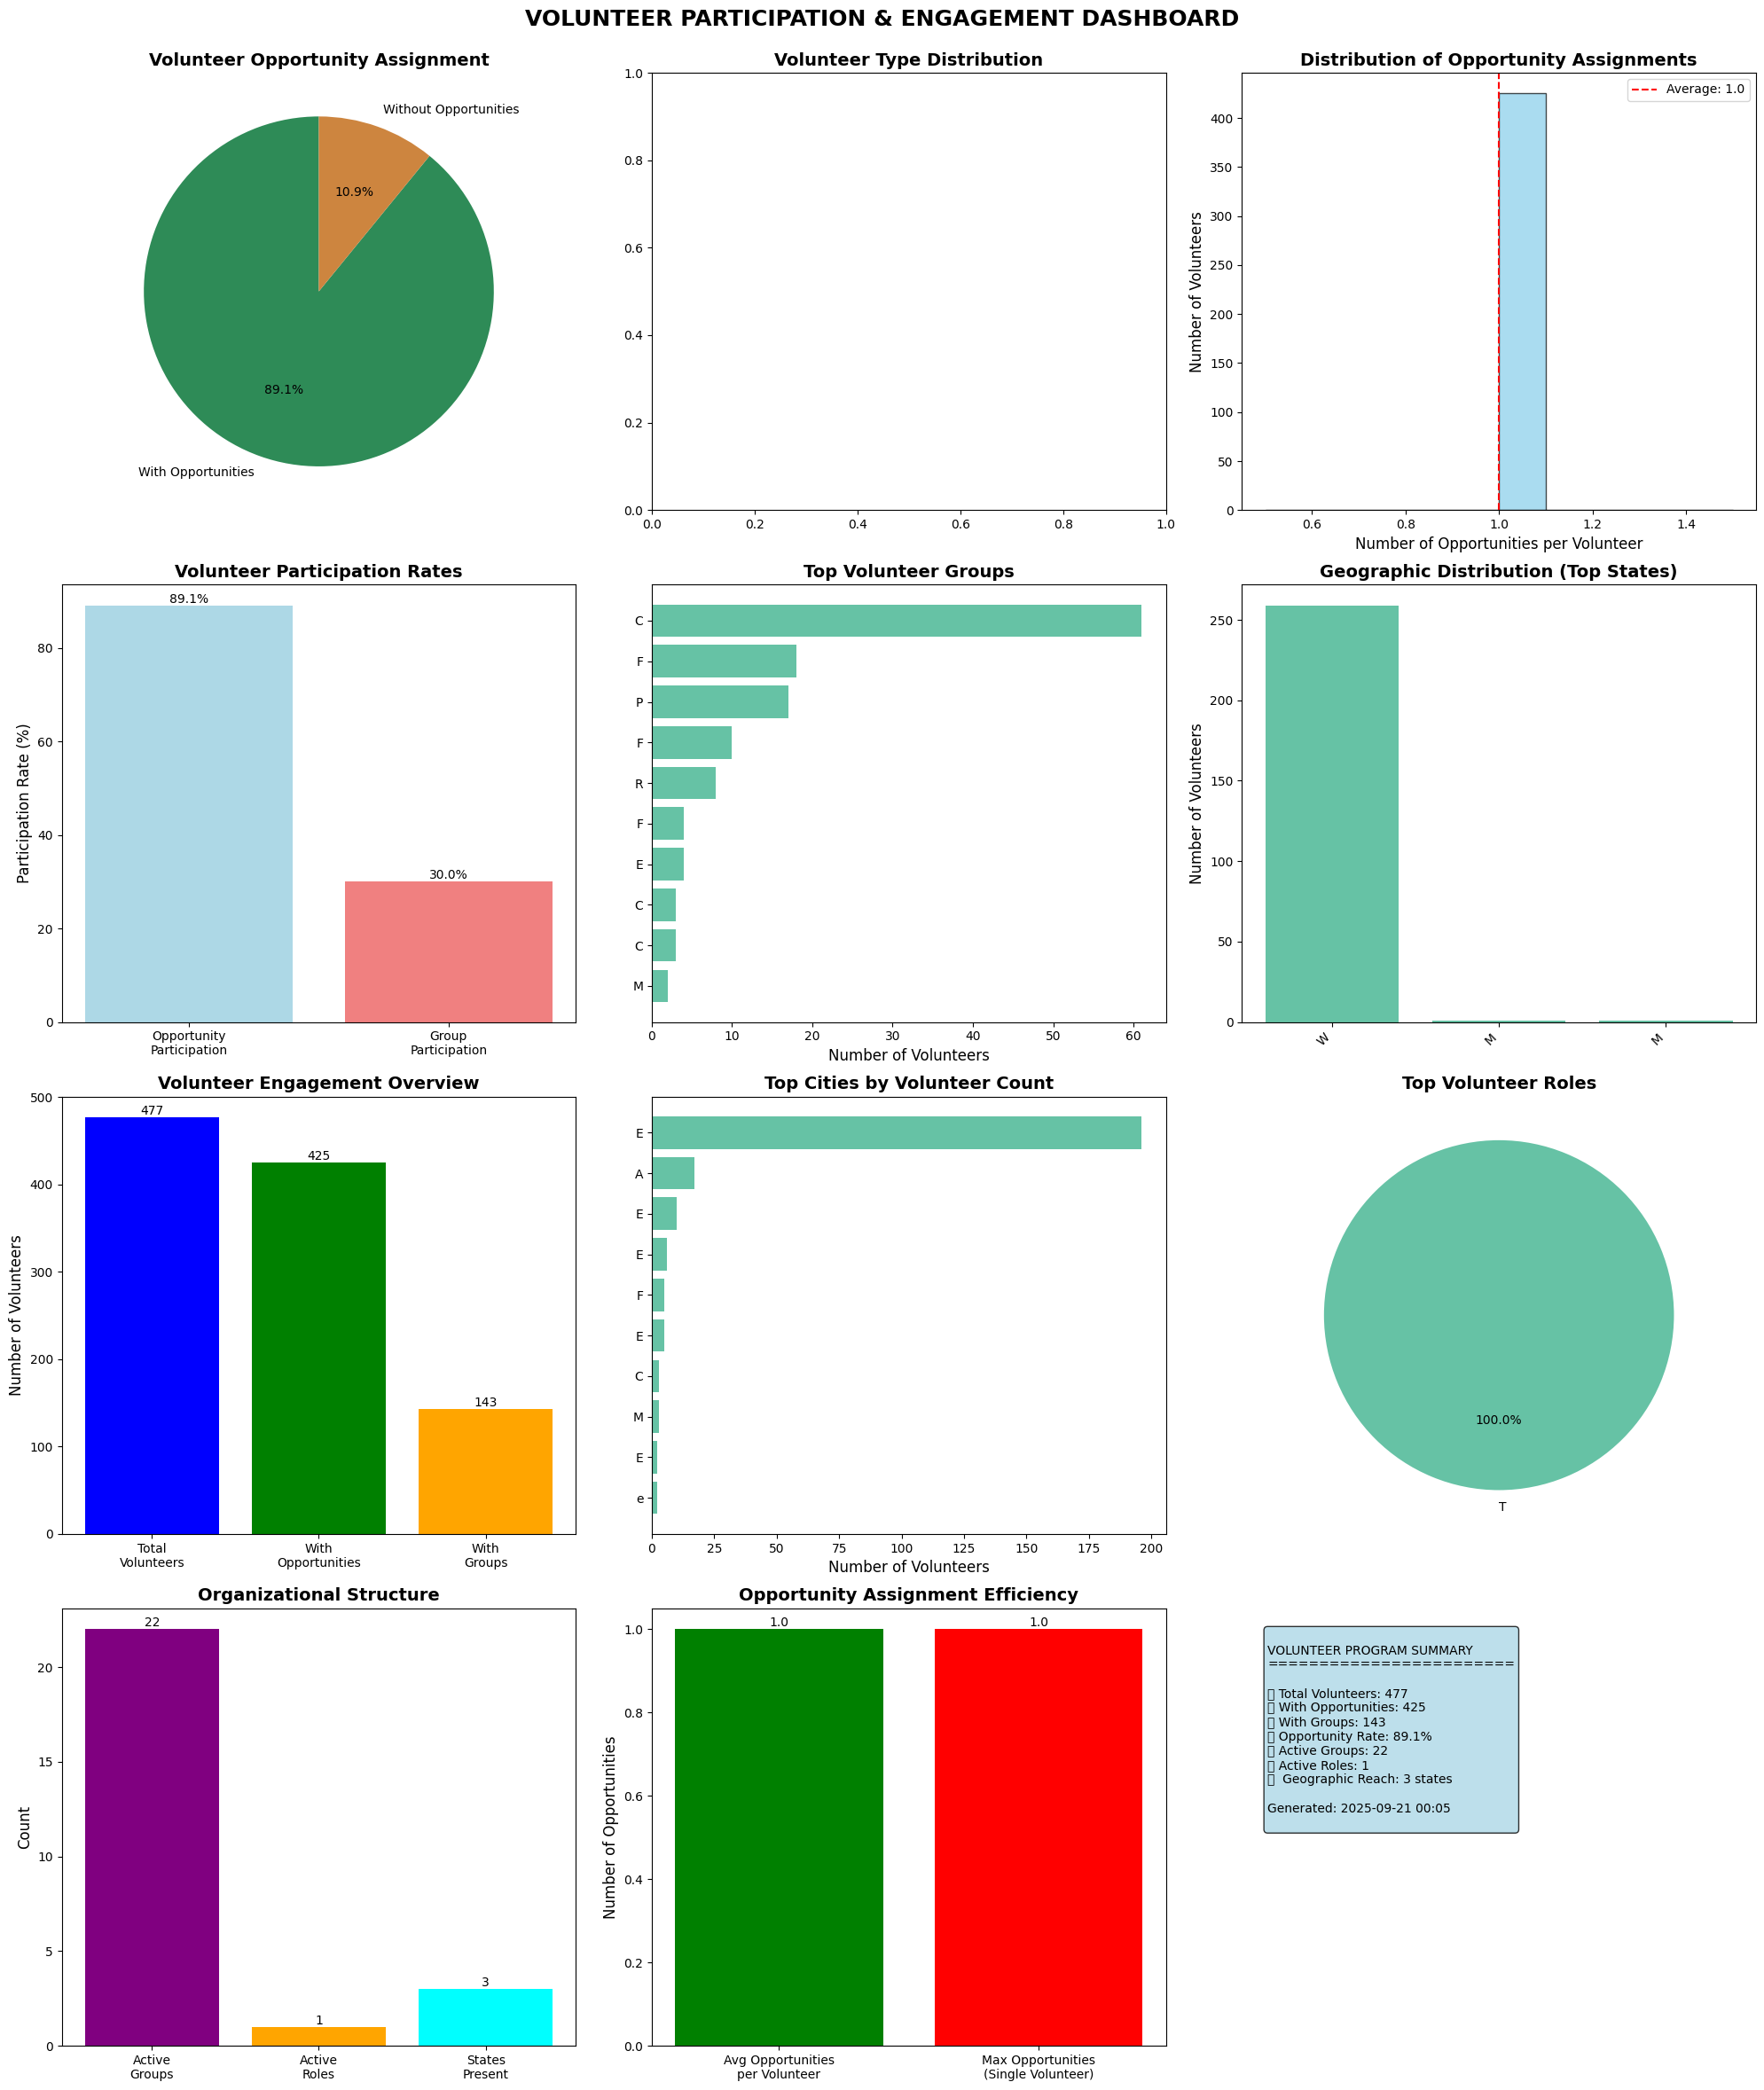

✅ Volunteer Participation Dashboard created successfully


In [4]:
# Dashboard function updated for participation-based metrics
def create_volunteer_engagement_dashboard():
    """Create comprehensive volunteer engagement visualizations focused on participation."""
    # Check if required variables exist and have data
    try:
        if 'all_volunteers' not in globals() or 'kpis' not in globals():
            print("❌ Data not available - please run data collection and KPI calculation cells first")
            return
        
        if not all_volunteers or not kpis:
            print("❌ No data available for visualization")
            return
    except NameError:
        print("❌ Variables not defined - please run data collection and KPI calculation cells first")
        return
    
    print("📊 Creating Volunteer Engagement Dashboard...")
    print("   💡 Dashboard focuses on participation and engagement metrics")
    
    # Create comprehensive dashboard
    fig = plt.figure(figsize=(20, 24))
    
    # 1. Volunteer Participation Overview (Pie Chart)
    ax1 = plt.subplot(4, 3, 1)
    opportunity_volunteers = kpis['volunteers_with_opportunities']
    no_opportunity_volunteers = kpis['total_volunteers'] - opportunity_volunteers
    
    labels = ['With Opportunities', 'Without Opportunities']
    sizes = [opportunity_volunteers, no_opportunity_volunteers]
    colors = ['#2E8B57', '#CD853F']
    
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    ax1.set_title('Volunteer Opportunity Assignment', fontsize=14, fontweight='bold')
    
    # 2. Account Type Distribution
    ax2 = plt.subplot(4, 3, 2)
    if kpis['individual_count'] > 0 or kpis['organization_count'] > 0:
        account_labels = ['Individuals', 'Organizations']
        account_sizes = [kpis['individual_count'], kpis['organization_count']]
        ax2.pie(account_sizes, labels=account_labels, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Volunteer Type Distribution', fontsize=14, fontweight='bold')
    
    # 3. Opportunity Assignments Distribution
    ax3 = plt.subplot(4, 3, 3)
    if kpis['opportunity_assignments']:
        ax3.hist(kpis['opportunity_assignments'], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
        ax3.axvline(np.mean(kpis['opportunity_assignments']), color='red', linestyle='--', 
                   label=f'Average: {np.mean(kpis["opportunity_assignments"]):.1f}')
        ax3.set_xlabel('Number of Opportunities per Volunteer')
        ax3.set_ylabel('Number of Volunteers')
        ax3.set_title('Distribution of Opportunity Assignments', fontsize=14, fontweight='bold')
        ax3.legend()
    else:
        ax3.text(0.5, 0.5, 'No Opportunity\nData Available', ha='center', va='center', 
                transform=ax3.transAxes, fontsize=12)
        ax3.set_title('Opportunity Distribution', fontsize=14, fontweight='bold')
    
    # 4. Participation Rates Comparison
    ax4 = plt.subplot(4, 3, 4)
    categories = ['Opportunity\nParticipation', 'Group\nParticipation']
    rates = [kpis['opportunity_participation_rate'], kpis['group_participation_rate']]
    bars = ax4.bar(categories, rates, color=['lightblue', 'lightcoral'])
    ax4.set_ylabel('Participation Rate (%)')
    ax4.set_title('Volunteer Participation Rates', fontsize=14, fontweight='bold')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom')
    
    # 5. Volunteer Groups Analysis
    ax5 = plt.subplot(4, 3, 5)
    if kpis['groups']:
        # Show top 10 groups
        sorted_groups = sorted(kpis['groups'].items(), key=lambda x: x[1], reverse=True)[:10]
        group_names = [item[0][:15] + '...' if len(item[0]) > 15 else item[0] for item, _ in sorted_groups]
        group_counts = [count for _, count in sorted_groups]
        
        ax5.barh(range(len(group_names)), group_counts)
        ax5.set_yticks(range(len(group_names)))
        ax5.set_yticklabels(group_names)
        ax5.set_xlabel('Number of Volunteers')
        ax5.set_title('Top Volunteer Groups', fontsize=14, fontweight='bold')
        ax5.invert_yaxis()
    else:
        ax5.text(0.5, 0.5, 'No Group Data\nAvailable', ha='center', va='center', 
                transform=ax5.transAxes, fontsize=12)
        ax5.set_title('Volunteer Groups', fontsize=14, fontweight='bold')
    
    # 6. Geographic Distribution
    ax6 = plt.subplot(4, 3, 6)
    if kpis['states']:
        # Show top 10 states
        sorted_states = sorted(kpis['states'].items(), key=lambda x: x[1], reverse=True)[:10]
        state_names = [item[0] for item, _ in sorted_states]
        state_counts = [count for _, count in sorted_states]
        
        ax6.bar(range(len(state_names)), state_counts)
        ax6.set_xticks(range(len(state_names)))
        ax6.set_xticklabels(state_names, rotation=45, ha='right')
        ax6.set_ylabel('Number of Volunteers')
        ax6.set_title('Geographic Distribution (Top States)', fontsize=14, fontweight='bold')
    else:
        ax6.text(0.5, 0.5, 'No Geographic\nData Available', ha='center', va='center', 
                transform=ax6.transAxes, fontsize=12)
        ax6.set_title('Geographic Distribution', fontsize=14, fontweight='bold')
    
    # 7. Volunteer Engagement Metrics
    ax7 = plt.subplot(4, 3, 7)
    engagement_categories = ['Total\nVolunteers', 'With\nOpportunities', 'With\nGroups']
    engagement_values = [
        kpis['total_volunteers'],
        kpis['volunteers_with_opportunities'],
        kpis['volunteers_with_groups']
    ]
    
    bars = ax7.bar(engagement_categories, engagement_values, color=['blue', 'green', 'orange'])
    ax7.set_ylabel('Number of Volunteers')
    ax7.set_title('Volunteer Engagement Overview', fontsize=14, fontweight='bold')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax7.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    # 8. Top Cities (if city data available)
    ax8 = plt.subplot(4, 3, 8)
    if kpis['cities']:
        sorted_cities = sorted(kpis['cities'].items(), key=lambda x: x[1], reverse=True)[:10]
        city_names = [item[0][:15] + '...' if len(item[0]) > 15 else item[0] for item, _ in sorted_cities]
        city_counts = [count for _, count in sorted_cities]
        
        ax8.barh(range(len(city_names)), city_counts)
        ax8.set_yticks(range(len(city_names)))
        ax8.set_yticklabels(city_names)
        ax8.set_xlabel('Number of Volunteers')
        ax8.set_title('Top Cities by Volunteer Count', fontsize=14, fontweight='bold')
        ax8.invert_yaxis()
    else:
        ax8.text(0.5, 0.5, 'No City Data\nAvailable', ha='center', va='center', 
                transform=ax8.transAxes, fontsize=12)
        ax8.set_title('City Distribution', fontsize=14, fontweight='bold')
    
    # 9. Volunteer Roles Distribution
    ax9 = plt.subplot(4, 3, 9)
    if kpis['roles']:
        # Show top roles as pie chart
        sorted_roles = sorted(kpis['roles'].items(), key=lambda x: x[1], reverse=True)[:8]
        role_names = [item[0][:15] + '...' if len(item[0]) > 15 else item[0] for item, _ in sorted_roles]
        role_counts = [count for _, count in sorted_roles]
        
        ax9.pie(role_counts, labels=role_names, autopct='%1.1f%%', startangle=90)
        ax9.set_title('Top Volunteer Roles', fontsize=14, fontweight='bold')
    else:
        ax9.text(0.5, 0.5, 'No Role Data\nAvailable', ha='center', va='center', 
                transform=ax9.transAxes, fontsize=12)
        ax9.set_title('Volunteer Roles', fontsize=14, fontweight='bold')
    
    # 10. Organizational Structure Metrics
    ax10 = plt.subplot(4, 3, 10)
    structure_metrics = [
        'Active\nGroups',
        'Active\nRoles',
        'States\nPresent'
    ]
    structure_values = [
        len(kpis['groups']),
        len(kpis['roles']),
        len(kpis['states'])
    ]
    
    bars = ax10.bar(structure_metrics, structure_values, color=['purple', 'orange', 'cyan'])
    ax10.set_ylabel('Count')
    ax10.set_title('Organizational Structure', fontsize=14, fontweight='bold')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax10.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}',
                 ha='center', va='bottom')
    
    # 11. Participation Efficiency
    ax11 = plt.subplot(4, 3, 11)
    if kpis['total_opportunity_assignments'] > 0:
        efficiency_metrics = ['Avg Opportunities\nper Volunteer', 'Max Opportunities\n(Single Volunteer)']
        efficiency_values = [kpis['avg_opportunities_per_volunteer'], kpis['max_opportunities']]
        
        bars = ax11.bar(efficiency_metrics, efficiency_values, color=['green', 'red'])
        ax11.set_ylabel('Number of Opportunities')
        ax11.set_title('Opportunity Assignment Efficiency', fontsize=14, fontweight='bold')
        
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax11.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.1f}',
                     ha='center', va='bottom')
    else:
        ax11.text(0.5, 0.5, 'No Opportunity\nAssignment Data', ha='center', va='center', 
                 transform=ax11.transAxes, fontsize=12)
        ax11.set_title('Opportunity Efficiency', fontsize=14, fontweight='bold')
    
    # 12. Summary Statistics Box
    ax12 = plt.subplot(4, 3, 12)
    ax12.axis('off')
    
    summary_text = f"""
VOLUNTEER PROGRAM SUMMARY
========================

📊 Total Volunteers: {kpis['total_volunteers']:,}
🎯 With Opportunities: {kpis['volunteers_with_opportunities']:,}
👥 With Groups: {kpis['volunteers_with_groups']:,}
📈 Opportunity Rate: {kpis['opportunity_participation_rate']:.1f}%
🏢 Active Groups: {len(kpis['groups'])}
🎭 Active Roles: {len(kpis['roles'])}
🗺️  Geographic Reach: {len(kpis['states'])} states

Generated: {datetime.now().strftime('%Y-%m-%d %H:%M')}
    """
    
    ax12.text(0.05, 0.95, summary_text, transform=ax12.transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    plt.suptitle('VOLUNTEER PARTICIPATION & ENGAGEMENT DASHBOARD', fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()
    
    print("✅ Volunteer Participation Dashboard created successfully")

# Dashboard function defined above - call it after running data collection and KPI calculation
# Generate the dashboard after KPI calculation
create_volunteer_engagement_dashboard()

## Strategic Recommendations

In [5]:
def generate_strategic_recommendations():
    """Generate strategic recommendations based on volunteer participation data analysis."""
    if not kpis:
        print("❌ No KPI data available for recommendations")
        return
    
    print("\n🎯 STRATEGIC RECOMMENDATIONS FOR VOLUNTEER PROGRAM")
    print("=" * 60)
    print("   💡 Recommendations based on participation and engagement metrics")
    
    recommendations = []
    priorities = []
    
    # Analyze opportunity participation rate
    if kpis['opportunity_participation_rate'] < 30:
        recommendations.append({
            'category': '🔴 HIGH PRIORITY - Low Opportunity Engagement',
            'issue': f"Low opportunity participation rate ({kpis['opportunity_participation_rate']:.1f}%) indicates many volunteers are not actively engaged",
            'actions': [
                "Create more diverse volunteer opportunities to match interests",
                "Improve volunteer onboarding and opportunity assignment process",
                "Conduct surveys to understand volunteer preferences and barriers",
                "Implement better communication about available opportunities",
                "Establish clear volunteer opportunity descriptions and expectations"
            ]
        })
        priorities.append("Opportunity Engagement")
    elif kpis['opportunity_participation_rate'] < 60:
        recommendations.append({
            'category': '🟡 MEDIUM PRIORITY - Opportunity Engagement Improvement',
            'issue': f"Moderate opportunity participation rate ({kpis['opportunity_participation_rate']:.1f}%) has room for improvement",
            'actions': [
                "Enhance volunteer opportunity matching system",
                "Create volunteer interest tracking and personalized assignments",
                "Implement peer-to-peer opportunity recommendations"
            ]
        })
    else:
        recommendations.append({
            'category': '🟢 STRENGTH - Strong Opportunity Engagement',
            'issue': f"Excellent opportunity participation rate ({kpis['opportunity_participation_rate']:.1f}%) shows effective volunteer utilization",
            'actions': [
                "Document and share best practices for opportunity management",
                "Use successful volunteers as mentors for new volunteers",
                "Expand successful opportunity programs"
            ]
        })
    
    # Analyze group participation
    if kpis['group_participation_rate'] < 40:
        recommendations.append({
            'category': '🟡 MEDIUM PRIORITY - Group Organization',
            'issue': f"Low group participation rate ({kpis['group_participation_rate']:.1f}%) suggests need for better volunteer organization",
            'actions': [
                "Create more volunteer groups based on interests and skills",
                "Implement group-based volunteer activities and projects",
                "Establish group leaders and communication systems",
                "Offer group-specific training and development opportunities"
            ]
        })
        priorities.append("Volunteer Organization")
    
    # Analyze volunteer distribution and efficiency
    if kpis['total_volunteers'] < 50:
        recommendations.append({
            'category': '📈 GROWTH OPPORTUNITY - Small Volunteer Base',
            'issue': f"Limited volunteer base ({kpis['total_volunteers']} total) suggests growth potential",
            'actions': [
                "Develop targeted volunteer recruitment campaigns",
                "Create volunteer referral incentive programs",
                "Partner with local organizations for volunteer recruitment",
                "Leverage social media and community events for recruitment"
            ]
        })
        priorities.append("Volunteer Recruitment")
    
    # Opportunity assignment efficiency
    if kpis['avg_opportunities_per_volunteer'] < 1.5:
        recommendations.append({
            'category': '⚠️  ATTENTION - Low Opportunity Assignment',
            'issue': f"Low average opportunities per volunteer ({kpis['avg_opportunities_per_volunteer']:.1f}) indicates underutilization",
            'actions': [
                "Create more diverse volunteer opportunities",
                "Implement skills-based volunteer matching",
                "Develop project-based and ongoing volunteer roles",
                "Establish volunteer progression pathways"
            ]
        })
        priorities.append("Opportunity Creation")
    elif kpis['max_opportunities'] > 10:
        recommendations.append({
            'category': '⚠️  ATTENTION - Volunteer Overload Risk',
            'issue': f"Some volunteers have many opportunities ({kpis['max_opportunities']} max) - risk of burnout",
            'actions': [
                "Monitor high-engagement volunteers for burnout signs",
                "Recruit additional volunteers to share workload",
                "Implement volunteer workload management systems",
                "Create backup systems for key volunteer roles"
            ]
        })
        priorities.append("Volunteer Burnout Prevention")
    
    # Geographic and organizational structure analysis
    if len(kpis['states']) > 3:
        recommendations.append({
            'category': '🟢 STRENGTH - Geographic Diversity',
            'issue': f"Strong geographic presence ({len(kpis['states'])} states) demonstrates broad reach",
            'actions': [
                "Leverage geographic diversity for local outreach programs",
                "Create regional volunteer coordination systems",
                "Share successful practices across different regions"
            ]
        })
    
    if len(kpis['groups']) < 3:
        recommendations.append({
            'category': '🏢 ORGANIZATION - Limited Group Structure',
            'issue': f"Few volunteer groups ({len(kpis['groups'])}) may limit organizational effectiveness",
            'actions': [
                "Create skill-based or interest-based volunteer groups",
                "Establish functional volunteer teams (events, communications, etc.)",
                "Implement group leadership structure and development"
            ]
        })
    
    # Display recommendations
    for i, rec in enumerate(recommendations, 1):
        print(f"\n{i}. {rec['category']}")
        print("-" * len(rec['category']))
        print(f"Issue: {rec['issue']}")
        print("Recommended Actions:")
        for action in rec['actions']:
            print(f"  • {action}")
    
    # Priority summary
    if priorities:
        print(f"\n🎯 TOP PRIORITIES FOR ACTION:")
        print("-" * 30)
        for i, priority in enumerate(priorities, 1):
            print(f"{i}. {priority}")
    
    # Implementation timeline
    print(f"\n📅 IMPLEMENTATION TIMELINE SUGGESTIONS:")
    print("-" * 40)
    print("Immediate (0-30 days):")
    print("  • Volunteer interest and skills assessment")
    print("  • Current opportunity evaluation and gap analysis")
    print("  • Volunteer communication system review")
    
    print("\nShort-term (1-3 months):")
    print("  • Implement high-priority recommendations")
    print("  • Create new volunteer opportunities based on gaps")
    print("  • Establish volunteer group structure")
    
    print("\nMedium-term (3-6 months):")
    print("  • Develop volunteer skills-based matching system")
    print("  • Launch recruitment partnerships and campaigns")
    print("  • Create volunteer development and progression programs")
    
    print("\nLong-term (6-12 months):")
    print("  • Scale successful volunteer programs")
    print("  • Evaluate volunteer program impact and effectiveness")
    print("  • Plan for sustainable volunteer program growth")
    
    print("\n" + "=" * 60)
    print("📊 For detailed metrics, refer to the participation dashboard above")
    print("📈 Schedule monthly reviews to track volunteer engagement progress")
    print("🤝 Involve volunteers in program planning and opportunity development")

generate_strategic_recommendations()


🎯 STRATEGIC RECOMMENDATIONS FOR VOLUNTEER PROGRAM
   💡 Recommendations based on participation and engagement metrics

1. 🟢 STRENGTH - Strong Opportunity Engagement
------------------------------------------
Issue: Excellent opportunity participation rate (89.1%) shows effective volunteer utilization
Recommended Actions:
  • Document and share best practices for opportunity management
  • Use successful volunteers as mentors for new volunteers
  • Expand successful opportunity programs

2. 🟡 MEDIUM PRIORITY - Group Organization
--------------------------------------
Issue: Low group participation rate (30.0%) suggests need for better volunteer organization
Recommended Actions:
  • Create more volunteer groups based on interests and skills
  • Implement group-based volunteer activities and projects
  • Establish group leaders and communication systems
  • Offer group-specific training and development opportunities

3. ⚠️  ATTENTION - Low Opportunity Assignment
--------------------------

## Executive Report Generation

In [6]:
def generate_executive_report():
    """Generate executive summary report for leadership focused on participation metrics."""
    if not kpis:
        print("❌ No data available for executive report")
        return
    
    report_date = datetime.now().strftime('%B %d, %Y')
    
    print("\n" + "=" * 80)
    print("📊 VOLUNTEER PROGRAM EXECUTIVE REPORT")
    print("=" * 80)
    print(f"Report Date: {report_date}")
    print(f"Analysis Focus: Volunteer Participation & Engagement")
    
    print("\n📋 EXECUTIVE SUMMARY")
    print("-" * 20)
    print(f"Our volunteer program currently manages {kpis['total_volunteers']} volunteers ")
    print(f"with {kpis['volunteers_with_opportunities']} actively assigned to specific opportunities ")
    print(f"({kpis['opportunity_participation_rate']:.1f}% opportunity participation rate). ")
    
    if kpis['volunteers_with_groups'] > 0:
        print(f"Additionally, {kpis['volunteers_with_groups']} volunteers are organized into ")
        print(f"structured groups ({kpis['group_participation_rate']:.1f}% group participation rate), ")
        print(f"demonstrating strong organizational engagement.")
    else:
        print(f"The program shows opportunity for improved organizational structure through ")
        print(f"volunteer group development and coordination.")
    
    print("\n📊 KEY METRICS")
    print("-" * 15)
    print(f"• Total Volunteer Base: {kpis['total_volunteers']:,} individuals/organizations")
    print(f"• Opportunity Participation Rate: {kpis['opportunity_participation_rate']:.1f}%")
    print(f"• Group Participation Rate: {kpis['group_participation_rate']:.1f}%")
    print(f"• Average Opportunities per Volunteer: {kpis['avg_opportunities_per_volunteer']:.1f}")
    print(f"• Total Opportunity Assignments: {kpis['total_opportunity_assignments']:,}")
    
    print("\n🏢 ORGANIZATIONAL STRUCTURE")
    print("-" * 28)
    print(f"• Active Volunteer Groups: {len(kpis['groups']):,}")
    print(f"• Active Volunteer Roles: {len(kpis['roles']):,}")
    print(f"• Geographic Presence: {len(kpis['states'])} states, {len(kpis['cities'])} cities")
    print(f"• Individual vs Organization: {kpis['individual_count']} individuals, {kpis['organization_count']} organizations")
    
    print("\n🎯 ENGAGEMENT EFFECTIVENESS")
    print("-" * 26)
    
    # Calculate engagement quality metrics
    engagement_quality = "Strong" if kpis['opportunity_participation_rate'] > 60 else "Moderate" if kpis['opportunity_participation_rate'] > 30 else "Needs Improvement"
    organizational_maturity = "Well-Structured" if len(kpis['groups']) > 5 else "Developing" if len(kpis['groups']) > 2 else "Basic"
    geographic_reach = "Excellent" if len(kpis['states']) > 5 else "Good" if len(kpis['states']) > 2 else "Limited"
    
    print(f"• Volunteer Engagement Quality: {engagement_quality}")
    print(f"• Organizational Maturity: {organizational_maturity}")
    print(f"• Geographic Reach: {geographic_reach}")
    print(f"• Volunteer Utilization: {kpis['avg_opportunities_per_volunteer']:.1f} avg opportunities per volunteer")
    
    print("\n🚀 STRATEGIC INSIGHTS")
    print("-" * 20)
    
    insights = []
    
    if kpis['opportunity_participation_rate'] >= 60:
        insights.append("✅ Strong opportunity engagement demonstrates effective volunteer utilization")
    elif kpis['opportunity_participation_rate'] >= 30:
        insights.append("⚠️ Moderate opportunity engagement suggests room for improvement")
    else:
        insights.append("🔴 Low opportunity engagement requires immediate strategic intervention")
    
    if len(kpis['groups']) >= 5:
        insights.append("💪 Well-developed group structure supports organized volunteer management")
    elif len(kpis['groups']) >= 2:
        insights.append("📈 Developing group structure provides foundation for growth")
    else:
        insights.append("🏗️ Limited group structure presents opportunity for better organization")
    
    if len(kpis['states']) > 3:
        insights.append("🌟 Geographic diversity demonstrates broad community impact")
    
    if kpis['avg_opportunities_per_volunteer'] > 2:
        insights.append("🎯 High volunteer engagement shows strong opportunity matching")
    elif kpis['avg_opportunities_per_volunteer'] < 1:
        insights.append("📋 Low opportunity assignment suggests need for more volunteer roles")
    
    for insight in insights:
        print(f"• {insight}")
    
    print("\n🚀 RECOMMENDATIONS FOR LEADERSHIP")
    print("-" * 35)
    
    if kpis['opportunity_participation_rate'] < 50:
        print("1. PRIORITY: Enhance volunteer opportunity engagement")
        print("   - Develop more diverse and appealing volunteer opportunities")
        print("   - Improve volunteer-opportunity matching process")
        print("   - Implement volunteer interest assessment and tracking")
    
    if len(kpis['groups']) < 3:
        print("2. STRUCTURE: Develop volunteer group organization")
        print("   - Create skill-based or interest-based volunteer groups")
        print("   - Establish group leadership and coordination systems")
        print("   - Implement group-specific projects and initiatives")
    
    if kpis['total_volunteers'] < 100:
        print("3. GROWTH: Expand volunteer recruitment efforts")
        print("   - Develop targeted recruitment campaigns")
        print("   - Create volunteer referral incentive programs")
        print("   - Partner with local organizations for recruitment")
    
    print("4. INFRASTRUCTURE: Invest in volunteer management systems")
    print("   - Implement comprehensive volunteer tracking and coordination")
    print("   - Develop volunteer communication and engagement platforms")
    print("   - Create volunteer development and recognition programs")
    
    # Highlight top performing areas
    if kpis['groups']:
        top_groups = sorted(kpis['groups'].items(), key=lambda x: x[1], reverse=True)[:3]
        print("\n🏆 TOP PERFORMING VOLUNTEER GROUPS:")
        print("-" * 35)
        for i, (group, count) in enumerate(top_groups, 1):
            print(f"{i}. {group}: {count} volunteers")
    
    if kpis['states']:
        top_states = sorted(kpis['states'].items(), key=lambda x: x[1], reverse=True)[:3]
        print("\n🗺️ TOP GEOGRAPHIC AREAS:")
        print("-" * 24)
        for i, (state, count) in enumerate(top_states, 1):
            print(f"{i}. {state}: {count} volunteers")
    
    print("\n📅 NEXT STEPS")
    print("-" * 12)
    print("• Schedule monthly volunteer program reviews")
    print("• Establish volunteer advisory committee")
    print("• Develop comprehensive volunteer engagement strategy")
    print("• Create volunteer program success metrics and tracking")
    print("• Implement volunteer feedback and improvement systems")
    
    print("\n" + "=" * 80)
    print("Report prepared using Neon CRM volunteer participation analytics")
    print("For detailed visualizations, refer to the participation dashboard above")
    print("=" * 80)

generate_executive_report()


📊 VOLUNTEER PROGRAM EXECUTIVE REPORT
Report Date: September 21, 2025
Analysis Focus: Volunteer Participation & Engagement

📋 EXECUTIVE SUMMARY
--------------------
Our volunteer program currently manages 477 volunteers 
with 425 actively assigned to specific opportunities 
(89.1% opportunity participation rate). 
Additionally, 143 volunteers are organized into 
structured groups (30.0% group participation rate), 
demonstrating strong organizational engagement.

📊 KEY METRICS
---------------
• Total Volunteer Base: 477 individuals/organizations
• Opportunity Participation Rate: 89.1%
• Group Participation Rate: 30.0%
• Average Opportunities per Volunteer: 1.0
• Total Opportunity Assignments: 425

🏢 ORGANIZATIONAL STRUCTURE
----------------------------
• Active Volunteer Groups: 22
• Active Volunteer Roles: 1
• Geographic Presence: 3 states, 18 cities
• Individual vs Organization: 0 individuals, 0 organizations

🎯 ENGAGEMENT EFFECTIVENESS
--------------------------
• Volunteer Engagemen

## Data Export for Further Analysis

In [7]:
def export_volunteer_data_summary():
    """Export volunteer data summary for further analysis focused on participation."""
    if not all_volunteers:
        print("❌ No volunteer data to export")
        return
    
    print("📤 Preparing volunteer data export...")
    print("   💡 Export focuses on participation and engagement metrics")
    
    # Create DataFrame for analysis
    volunteer_records = []
    
    for volunteer in all_volunteers:
        # Extract and clean data - using participation-focused fields
        record = {
            'account_id': volunteer.get("Account ID", ""),
            'account_type': volunteer.get("Account Type", ""),
            'first_name': volunteer.get("First Name", ""),
            'last_name': volunteer.get("Last Name", ""),
            'company_name': volunteer.get("Company Name", ""),
            'email': volunteer.get("Email 1", ""),
            'city': volunteer.get("City", ""),
            'state': volunteer.get("State/Province", ""),
            'volunteer_group': volunteer.get("Volunteer Group", ""),
            'volunteer_role': volunteer.get("Volunteer Role", ""),
            'assigned_opportunities': volunteer.get("Assigned Opportunities", ""),
        }
        
        # Calculate participation metrics
        has_opportunities = 1 if volunteer.get("Assigned Opportunities") else 0
        has_group = 1 if volunteer.get("Volunteer Group") else 0
        has_role = 1 if volunteer.get("Volunteer Role") else 0
        
        # Count opportunities if they are comma-separated
        opportunity_count = 0
        opportunities = volunteer.get("Assigned Opportunities")
        if opportunities:
            if isinstance(opportunities, str):
                opportunity_count = len([x.strip() for x in opportunities.split(',') if x.strip()])
            else:
                opportunity_count = 1
        
        record.update({
            'has_opportunities': has_opportunities,
            'has_group': has_group,
            'has_role': has_role,
            'opportunity_count': opportunity_count,
            'participation_score': has_opportunities + has_group + has_role,  # 0-3 scale
            'is_active_participant': 1 if (has_opportunities or has_group or has_role) else 0
        })
        
        volunteer_records.append(record)
    
    # Create DataFrame
    df = pd.DataFrame(volunteer_records)
    
    print(f"✅ Prepared data export with {len(df)} volunteer records")
    
    # Display summary statistics
    print("\n📊 EXPORT DATA SUMMARY")
    print("-" * 25)
    print(f"Total Records: {len(df)}")
    print(f"With Opportunities: {df['has_opportunities'].sum()}")
    print(f"With Groups: {df['has_group'].sum()}")
    print(f"With Roles: {df['has_role'].sum()}")
    print(f"Active Participants: {df['is_active_participant'].sum()}")
    print(f"Total Opportunity Assignments: {df['opportunity_count'].sum()}")
    print(f"Average Participation Score: {df['participation_score'].mean():.1f}/3")
    
    # Show sample of the data
    print("\n📋 SAMPLE DATA (First 5 Records):")
    print("-" * 35)
    
    display_columns = [
        'account_id', 'first_name', 'last_name', 'volunteer_group', 
        'opportunity_count', 'participation_score', 'is_active_participant'
    ]
    
    sample_df = df[display_columns].head()
    print(sample_df.to_string(index=False))
    
    # Show group summary
    if df['volunteer_group'].notna().sum() > 0:
        print("\n👥 VOLUNTEER GROUPS SUMMARY:")
        print("-" * 30)
        group_summary = df[df['volunteer_group'].notna()].groupby('volunteer_group').agg({
            'account_id': 'count',
            'opportunity_count': 'sum',
            'is_active_participant': 'sum',
            'participation_score': 'mean'
        }).rename(columns={
            'account_id': 'total_volunteers',
            'opportunity_count': 'total_opportunities',
            'is_active_participant': 'active_participants',
            'participation_score': 'avg_participation_score'
        }).round(1)
        
        print(group_summary.head(10).to_string())
    
    # Show participation distribution
    print("\n📈 PARTICIPATION DISTRIBUTION:")
    print("-" * 30)
    participation_dist = df['participation_score'].value_counts().sort_index()
    for score, count in participation_dist.items():
        score_desc = {0: "No Participation", 1: "Low Participation", 2: "Moderate Participation", 3: "High Participation"}
        print(f"Score {score} ({score_desc.get(score, 'Unknown')}): {count} volunteers")
    
    # Show opportunity distribution
    if df['opportunity_count'].sum() > 0:
        print("\n🎯 OPPORTUNITY ASSIGNMENT DISTRIBUTION:")
        print("-" * 40)
        opp_dist = df['opportunity_count'].value_counts().sort_index()
        for count, volunteers in opp_dist.items():
            if count > 0:
                print(f"{count} opportunities: {volunteers} volunteers")
    
    print("\n💾 EXPORT OPTIONS:")
    print("-" * 17)
    print("• Data is prepared and ready for export")
    print("• Can be saved as CSV, Excel, or used for further Python analysis")
    print("• Contains participation metrics and engagement scores")
    print("• Suitable for volunteer management and engagement analysis")
    
    # Uncomment the following line to save as CSV
    # df.to_csv('volunteer_participation_export.csv', index=False)
    # print("✅ Data exported to 'volunteer_participation_export.csv'")
    
    return df

volunteer_df = export_volunteer_data_summary()

📤 Preparing volunteer data export...
   💡 Export focuses on participation and engagement metrics
✅ Prepared data export with 477 volunteer records

📊 EXPORT DATA SUMMARY
-------------------------
Total Records: 477
With Opportunities: 425
With Groups: 143
With Roles: 1
Active Participants: 477
Total Opportunity Assignments: 425
Average Participation Score: 1.2/3

📋 SAMPLE DATA (First 5 Records):
-----------------------------------
account_id first_name last_name       volunteer_group  opportunity_count  participation_score  is_active_participant
      2228 Linda Sue     Aaseng Postcard Writing 2/21                  1                    2                      1
      2321     Kerrie  Ackerson                  None                  1                    1                      1
      2208     Hector    Acosta                  None                  1                    1                      1
      2322       Iris     Adams                  None                  1                    1    

## Cleanup and Final Notes

In [8]:
# Cleanup
if client:
    client.close()
    print("✅ Neon CRM client connection closed")

print("\n🎯 VOLUNTEER ENGAGEMENT ANALYSIS COMPLETE")
print("=" * 45)
print("This analysis provides:")
print("• Executive-level KPIs and metrics")
print("• Comprehensive visual dashboard")
print("• Strategic recommendations")
print("• Implementation roadmap")
print("• Exportable data for further analysis")
print("\nUse these insights to drive volunteer program improvements and demonstrate value to stakeholders.")
print("\n📅 Recommended: Run this analysis quarterly to track progress and trends.")

✅ Neon CRM client connection closed

🎯 VOLUNTEER ENGAGEMENT ANALYSIS COMPLETE
This analysis provides:
• Executive-level KPIs and metrics
• Comprehensive visual dashboard
• Strategic recommendations
• Implementation roadmap
• Exportable data for further analysis

Use these insights to drive volunteer program improvements and demonstrate value to stakeholders.

📅 Recommended: Run this analysis quarterly to track progress and trends.
